# **Techniques in High Performance Computing**

##Getting Started with NumPy


In [ ]:
import numpy as np  

In [ ]:
a = np.array([3.5,4,18.1], dtype = 'float64')
a

array([ 3.5,  4. , 18.1])

In [ ]:
a_random = np.random.rand(10) #A random array with 10 components
a_ones = np.ones((10,10),dtype='float64') #A 10x10 matrix of ones stored at double [recision (floar 64)
a_zeros = np.zeros((10,10,10), dtype = 'complex128') #10x10x10 of tensors with both parts set to 0
e_empty = np.empty(50, dtype = 'byte') #An unitinitialsed byte array that can store 50 bytes.
a_range = np.arange(50) #First 50 integers strating at 0 

In [ ]:
print(a_range.shape)
print(a_zeros.shape)

(50,)
(10, 10, 10)


In [ ]:
a_ones[3, 3] = 10
a_ones[:, 4] = np.arange(10)
a_ones[8] = 10 # This sets the whole of row 8 to the entry 10
print(a_ones)

[[ 1.  1.  1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  2.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10.  3.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  4.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  5.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  6.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  7.  1.  1.  1.  1.  1.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [ 1.  1.  1.  1.  9.  1.  1.  1.  1.  1.]]


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

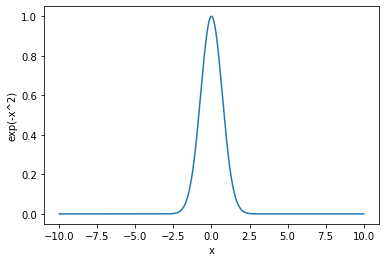

In [ ]:
x = np.linspace(-10,10,10000)
y = np.exp(-x**2)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('exp(-x^2)')
plt.show()

In [ ]:
#Create random 100x100 matrices in numpy
A = np.random.randn(100, 100)
B = np.random.randn(100, 100)

C = A @ B # Product of the matrices A and B
C

array([[ 7.03696281e+00,  7.93756880e+00,  1.15266471e+01, ...,
         3.08847636e+00,  7.72469861e+00, -1.36124006e+01],
       [ 1.25323765e+01,  4.01043041e+00, -1.79392982e+01, ...,
         3.47688616e+00,  2.91131714e+00,  6.44327114e+00],
       [ 4.41095888e-01,  4.31453875e+00, -2.24126084e-02, ...,
        -5.39774653e+00,  1.20093952e+01,  4.08927276e+00],
       ...,
       [-8.44960966e+00, -2.38988191e+00, -8.73904007e+00, ...,
         5.39846826e+00, -2.34043283e+01,  2.88172581e+00],
       [-9.52217211e+00, -1.27124365e+01, -2.80397830e+00, ...,
         4.86794906e+00,  8.42909513e+00, -2.03785061e+01],
       [-7.07232994e+00, -3.02930252e+00,  1.05044645e+01, ...,
         1.25684855e+01,  1.29688718e+01,  3.87377465e+00]])

In [ ]:
#Linear system solver Ax = b
A = np.random.rand(1000, 1000)
b = np.random.rand(1000)
x = np.linalg.solve(A, b)

In [ ]:
#What is the size of the error?
residual = np.linalg.norm(b - A @ x) / (np.linalg.norm(A) * np.linalg.norm(x))
print(residual)

1.6685187745088936e-16


##Parallel Computing Principles in python


For loop implimentation useing multi-threading

In [ ]:
import numpy as np
import threading
import multiprocessing

def worker(arr1, arr2, arr3, chunk):
    """The thread worker."""

    for index in chunk:
        arr3[index] = arr1[index] + arr2[index]

nthreads = multiprocessing.cpu_count()

n = 1000000
a = np.random.randn(n)
b = np.random.randn(n)

c = np.empty(n, dtype='float64')

chunks = np.array_split(range(n), nthreads)

all_threads = []

for chunk in chunks:
    thread = threading.Thread(target=worker, args=(a, b, c, chunk))
    all_threads.append(thread)
    thread.start()

for thread in all_threads:
    thread.join()

Parallelised vector addition 

In [ ]:
import numpy as np
import numba

n = 1000000
a = np.random.randn(n)
b = np.random.randn(n)

d = np.empty(n, dtype='float64')

@numba.njit(parallel=True)
def numba_fun(arr1, arr2, arr3):
    """The thread worker."""

    for index in numba.prange(n):
        arr3[index] = arr1[index] + arr2[index]

numba_fun(a, b, d)

In [ ]:
d

array([ 0.51396846, -0.74266551,  1.28006794, ...,  1.58429147,
        2.28301407,  0.17613607])

We can also use the python based parallelisation package called multiprocessing.
We definea worker in the same way as before, but we must specify that we want to use c type memory for doubles, and initialise a process for each chunck.

In [ ]:
import numpy as np
import multiprocessing
import ctypes

def worker(arr1, arr2, arr3, chunk):
    """The thread worker."""

    # Create Numpy arrays from the
    # shared multiprocessing arrays

    arr1_np = np.frombuffer(arr1.get_obj())
    arr2_np = np.frombuffer(arr2.get_obj())
    arr3_np = np.frombuffer(arr3.get_obj())

    for index in chunk:
        arr3_np[index] = arr1_np[index] + arr2_np[index]

nprocesses = multiprocessing.cpu_count()

n = 1000000

a = multiprocessing.Array(ctypes.c_double, n)
b = multiprocessing.Array(ctypes.c_double, n)
c = multiprocessing.Array(ctypes.c_double, n)


a[:] = np.random.randn(n)
b[:] = np.random.randn(n)

chunks = np.array_split(range(n), nprocesses)

all_processes = []

for chunk in chunks:
    process = multiprocessing.Process(target=worker, args=(a, b, c, chunk))
    all_processes.append(process)
    process.start()

for process in all_processes:
    process.join()

This example is very similar to the threading example. The main difference is the variable initialisation. Processes do not share the same memory. The multiprocessing module can copy over variables on intialisation automatically to the different processes. However, this is inefficient for large arrays, and we cannot easily write into a large array. The solution is to create shared arrays. These are special structures that can be accessed from all processes. The multiprocessing.Array type serves this purpose. It is very low-level. However, we can create a view of them as a Numpy array. This is done through the np.frombuffer command, which creates a Numpy type array based on the shared memory.

